In [1]:
import pandas as pd
import numpy as np

In [2]:
fake_df = pd.read_csv(r"h:\Desktop\BI Projet\FakeNews.csv")
real_df = pd.read_csv(r"h:\Desktop\BI Projet\RealNews.csv")
fake_df['Category'] = "False"
real_df['Category'] = "True"
fake_df.head()
real_df.head()

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [3]:
df = pd.concat([fake_df, real_df], axis=0)
df.head()

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


In [4]:
df.sample(5)

,title,text,subject,date,Category
249,Rep. Franks to resign after staff members' com...,WASHINGTON (Reuters) - Republican U.S. Represe...,politicsNews,"December 7, 2017",True
18262,Critic of Rwandan president to face criminal t...,KIGALI (Reuters) - A critic of Rwandan Preside...,worldnews,"October 5, 2017",True
11496,MADNESS IN BERKELEY: Anarchists Clash With Tru...,THE ANTIFA ANARCHISTS ARE IN ALL BLACK:WOMAN I...,politics,"Mar 4, 2017",False
9789,"NYC mayor presents $82.2 billion budget, overh...",NEW YORK (Reuters) - New York City’s Mayor Bil...,politicsNews,"April 26, 2016",True
15856,Russian bombers strike Islamic State targets i...,MOSCOW (Reuters) - Six Russian Tu-22M3 long-ra...,worldnews,"November 2, 2017",True


In [5]:
fake_df.shape

(23481, 5)

In [6]:
real_df.shape

(21417, 5)

In [7]:
df.shape

(44898, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   Category  44898 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [9]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
Category    0
dtype: int64

In [10]:
df.describe(include='all')

,title,text,subject,date,Category
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",False
freq,14,627,11272,182,23481


In [11]:
df = df.drop_duplicates(subset=['text'], keep="last")


In [12]:
df.to_csv(r"h:\Desktop\BI Projet\news.csv")

In [13]:
df.describe()


,title,text,subject,date,Category
count,38646,38646,38646,38646,38646
unique,38270,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,Donald Trump just couldn t wish all Americans ...,politicsNews,"December 6, 2017",True
freq,14,1,11203,166,21192


In [14]:
import scipy
# if this works
from scipy.sparse import issparse

In [15]:
# Splitting the Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['text'],df['Category'], test_size = 0.25, random_state = 100)

In [16]:
display(X_train.head())
display(Y_train.head())
len(X_train)

20942    LONDON (Reuters) - A row over how much money B...
10735    Hillary Clinton continues on the path to compl...
16368    TORONTO (Reuters) - A regional Latin American ...
18689    Johnny Carson must be rolling over in his grav...
18942    FORMER CONSERVATIVE darling Tomi Lahren made a...
Name: text, dtype: object

20942     True
10735    False
16368     True
18689    False
18942    False
Name: Category, dtype: object

28984

In [17]:
# TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
df_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = df_tfidf.fit_transform(X_train)
tfidf_test = df_tfidf.transform(X_test)
tfidf_train

<28984x105655 sparse matrix of type '<class 'numpy.float64'>'
	with 4411413 stored elements in Compressed Sparse Row format>

In [18]:
# Passive Aggressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier

pa_classifier = PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train, Y_train)

PassiveAggressiveClassifier(max_iter=50)

In [36]:
# Implementing the same algorithm to the test set
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
Y_pred = pa_classifier.predict(tfidf_test)
conf_mat = confusion_matrix(Y_test,Y_pred)
conf_mat

array([[4320,   62],
       [  30, 5250]], dtype=int64)

(<Figure size 800x550 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

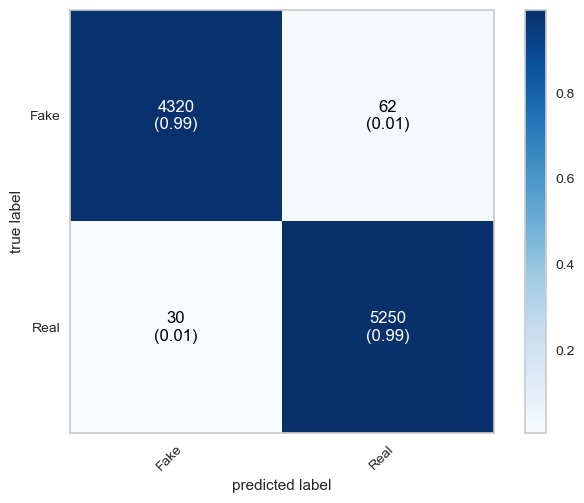

In [38]:
# plotting the confusion matrix

from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat, show_normed=True, colorbar=True, class_names=['Fake', 'Real'])

In [39]:
#Classification report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      4382
        True       0.99      0.99      0.99      5280

    accuracy                           0.99      9662
   macro avg       0.99      0.99      0.99      9662
weighted avg       0.99      0.99      0.99      9662



In [21]:
# calculating the accuracy of our prediction

acc_score = accuracy_score(Y_test, Y_pred)
f1score = f1_score(Y_test, Y_pred, pos_label='True')
print(acc_score)
print(f1score)


0.9904781618712482
0.9913141993957705


In [22]:
# Exploring the weights of the terms

weights_nonzero = pa_classifier.coef_[pa_classifier.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]

In [23]:
# extracting the indicator tokens

tokens = df_tfidf.get_feature_names_out()
tokens_nonzero = np.array(tokens)[pa_classifier.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]


In [24]:
num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

In [25]:
fake_indicator = pd.DataFrame({
    'Token': fake_indicator_tokens,
    'Weight': weights_nonzero_sorted[:num_tokens]
})

In [26]:
real_indicator = pd.DataFrame({
    'Token': real_indicator_tokens,
    'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
})

In [27]:
display(fake_indicator)
display(real_indicator)

,Token,Weight
0,read,-8.095979
1,featured,-8.055544
2,image,-7.526926
3,getty,-5.701256
4,gop,-5.666688
5,just,-4.811102
6,com,-4.763064
7,hillary,-4.567745
8,sen,-4.541436
9,rep,-4.026744


,Token,Weight
0,reuters,28.961677
1,nov,5.227854
2,washington,4.978785
3,wednesday,4.244319
4,thursday,4.131022
5,tuesday,3.917802
6,republican,3.815058
7,saying,3.413548
8,friday,3.326546
9,comment,3.223117


In [28]:
#checking number of articles that contain the tokens in fake and real news datasets respectively

fake_df_tokens = fake_df.text.loc[[np.any([token in body for token in fake_indicator.Token])for body in fake_df.text.str.lower()]]
real_df_tokens = real_df.text.loc[[np.any([token in body for token in real_indicator.Token])for body in real_df.text.str.lower()]]

print(fake_df_tokens)
print(len(fake_df_tokens)/len(fake_df) * 100,'%')
print(real_df_tokens)
print(len(real_df_tokens)/len(real_df) * 100, '%')

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 21913, dtype: object
93.32226055108386 %
0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Dona